In [1]:
import pandas as pd

red_url = 'https://github.com/PinkWink/ML_tutorial/raw/master/dataset/winequality-red.csv'
white_url = 'https://github.com/PinkWink/ML_tutorial/raw/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color']

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)

In [4]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [5]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [6]:
pipe.steps[0]

('scaler', StandardScaler())

In [7]:
pipe['scaler']

StandardScaler()

In [8]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [9]:
pipe['clf']

DecisionTreeClassifier(max_depth=2, random_state=13)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=13, stratify=y)


In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [12]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc : ', accuracy_score(y_test, y_pred_test))

Train Acc :  0.9657494708485664
Test Acc :  0.9576923076923077


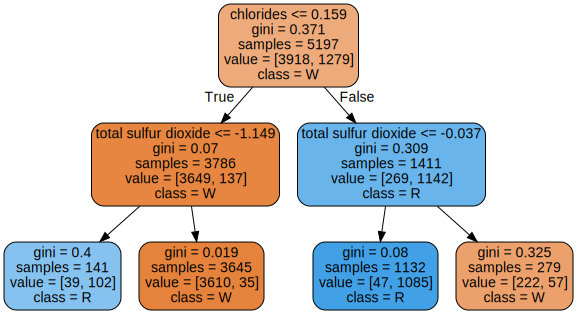

In [13]:
from graphviz import Source
from sklearn.tree import export_graphviz

Source(export_graphviz(pipe['clf'], feature_names=X.columns, class_names=['W', 'R'], rounded=True, filled=True))